In [2]:
from pathlib import Path
import cv2
import numpy as np
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output

In [4]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 
 
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
 
    return kernel_2D
 
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)
 
 

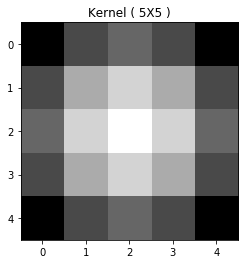

Found 3 Channels : (120, 250, 3)
Converted to Gray Channel. Size : (120, 250)
Kernel Shape : (5, 5)


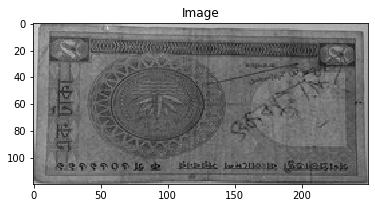

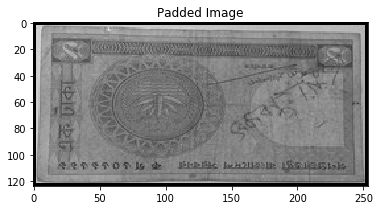

Output Image size : (120, 250)


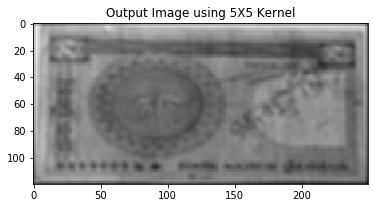

array([[ 54.58483258,  73.81047179,  88.19139712, ...,  76.37330184,
         63.77557845,  47.18428307],
       [ 73.79043613,  99.94395263, 118.72325069, ..., 103.28311482,
         86.38569227,  63.9035438 ],
       [ 88.13716375, 119.55028103, 140.9107962 , ..., 122.93535204,
        102.97748735,  76.16300855],
       ...,
       [ 67.44667041,  87.51249679, 100.87780315, ...,  85.44037309,
         72.55193417,  54.67584534],
       [ 59.75903513,  77.47992258,  88.89140206, ...,  72.09519527,
         61.40988067,  46.40229821],
       [ 46.86999409,  61.12174682,  70.14342317, ...,  54.2432907 ,
         46.38119146,  35.11763323]])

In [14]:
path = r'C:\Users\akia\bangla-money\Training\1\1_0.jpg'   ##for a single image
image=cv2.imread(path)
image=np.array(image)
gaussian_blur(image, 5, verbose=True)